In [2]:
import src.animation as animation
import matplotlib.pyplot as plt 
import numpy as np 
import src.fd as fd 

def getC2Gradient(f, dx):
    f_dx = 1/12*np.roll(f, 2*fd.ROLL_L) - 2/3*np.roll(f, fd.ROLL_L) + 2 / \
        3*np.roll(f, fd.ROLL_R) - 1/12*np.roll(f, 2*fd.ROLL_R)
    return f_dx/dx

def getv(phase, dx):
    return getC2Gradient(phase, dx)

0.10000000000000081


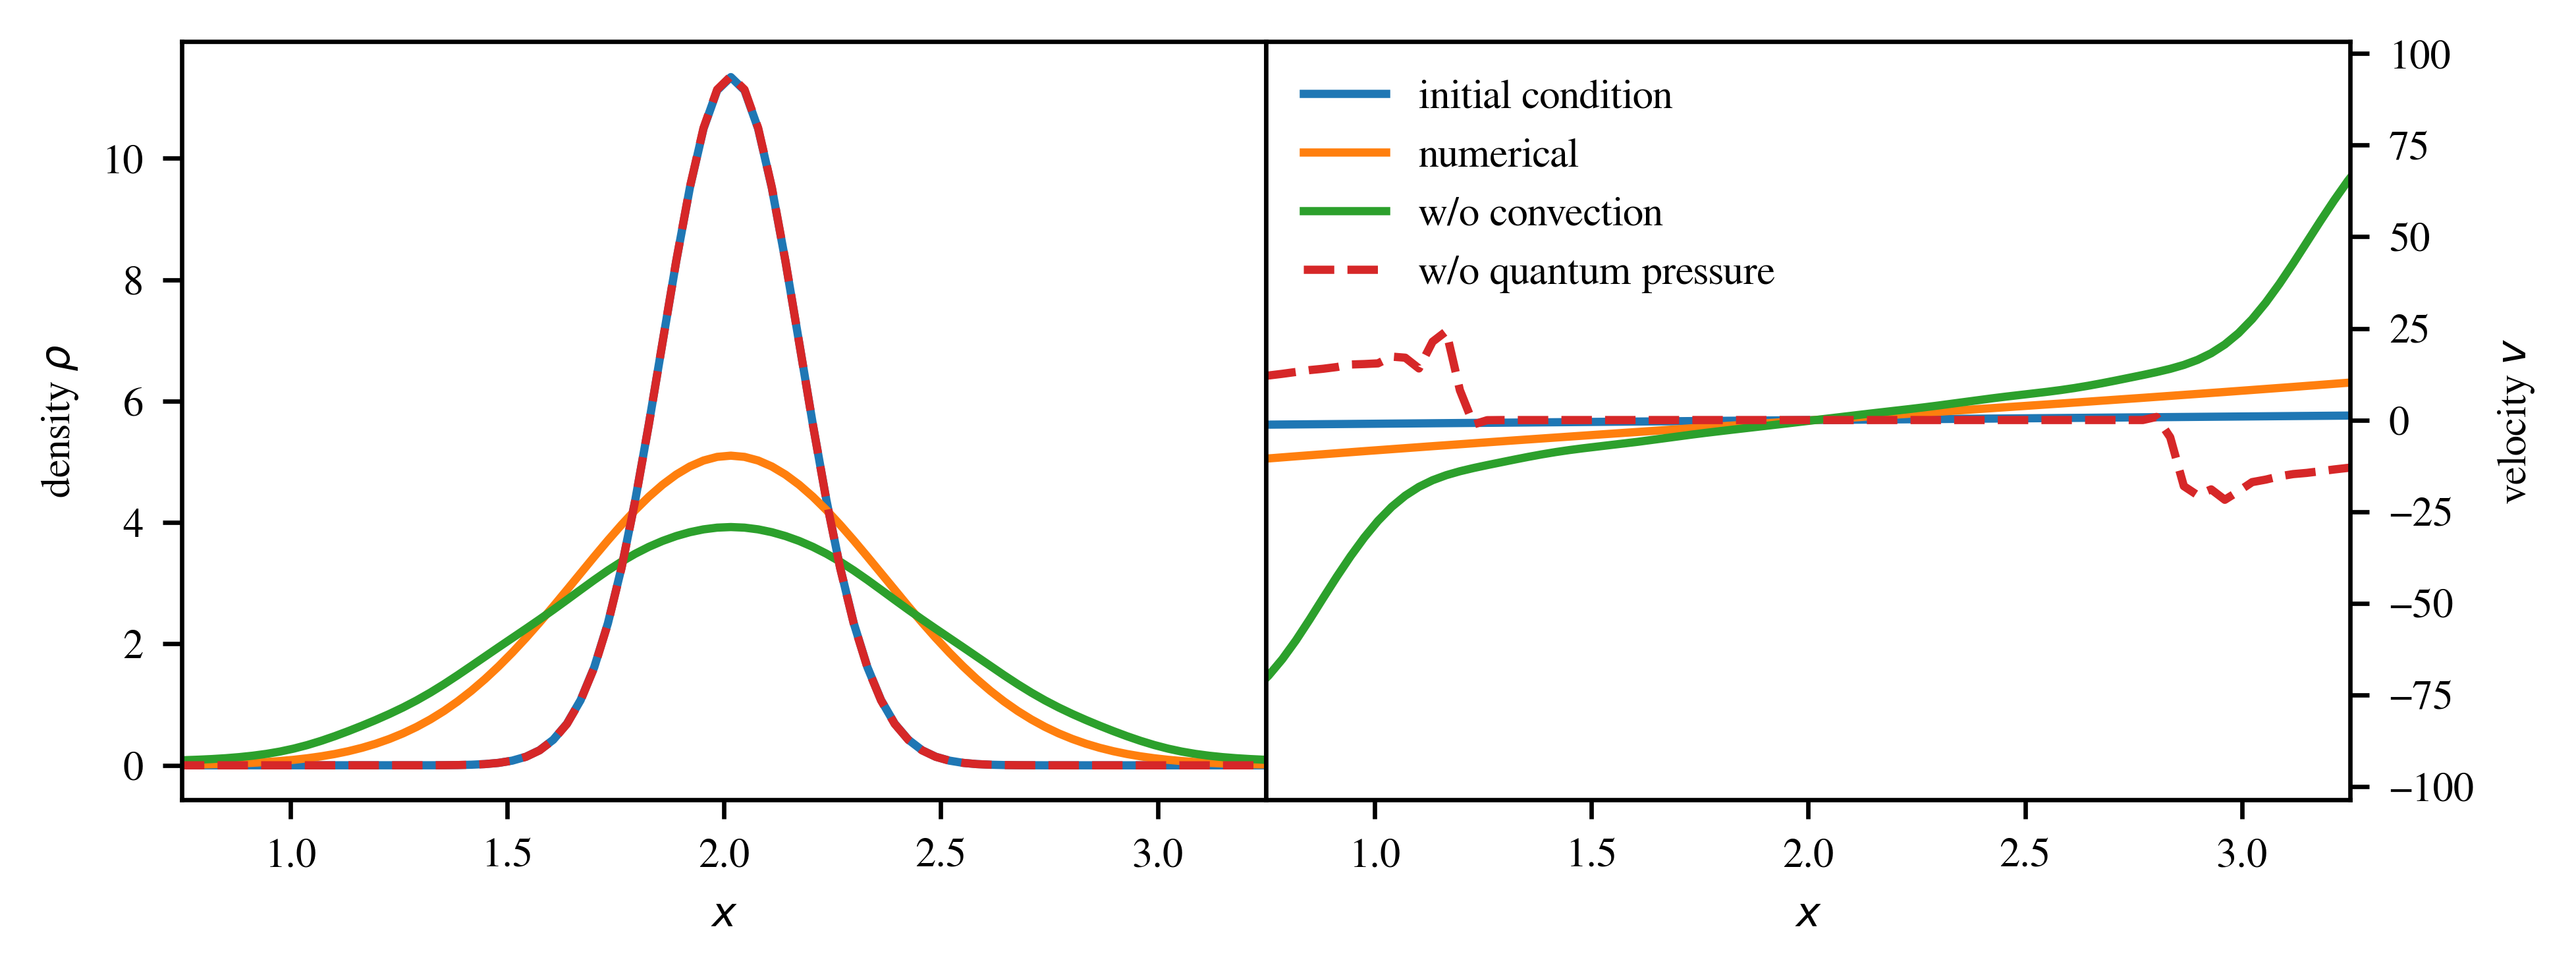

In [8]:
import matplotlib 

def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** 0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    return fig_width_in, fig_height_in


idx = 39
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/gaussian_wave_packet_ho-upwind__{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/gaussian_wave_packet_ho-upwind__{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind_without_convection/gaussian_wave_packet_ho-upwind__without_convection_{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(
    f"runs/1d/gaussian_wave_packet_ho-upwind_without_quantum_pressure/gaussian_wave_packet_ho-upwind__without_quantum_pressure_{idx}.npz"
    )
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
t = config1["t0"]
plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 7.5

print(t)
fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
plt.xticks()
plt.yticks()
plt.xlim(0.75, 3.25)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, density3[8:-8], ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
plt.xticks()
plt.yticks()
plt.xlim(0.75, 3.25)
plt.plot(xx, getv(phase0, dx)[8:-8], label = "initial condition")
plt.plot(xx, getv(phase1, dx)[8:-8], label = "numerical")
plt.plot(xx, getv(phase2, dx)[8:-8], label = "w/o convection")
plt.plot(xx, getv(phase3, dx)[8:-8], label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("$x$")
plt.ylabel("velocity $v$")
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/standing_gaussian.pdf", bbox_inches='tight')

In [12]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

0.0025249999999999834 0.005 1


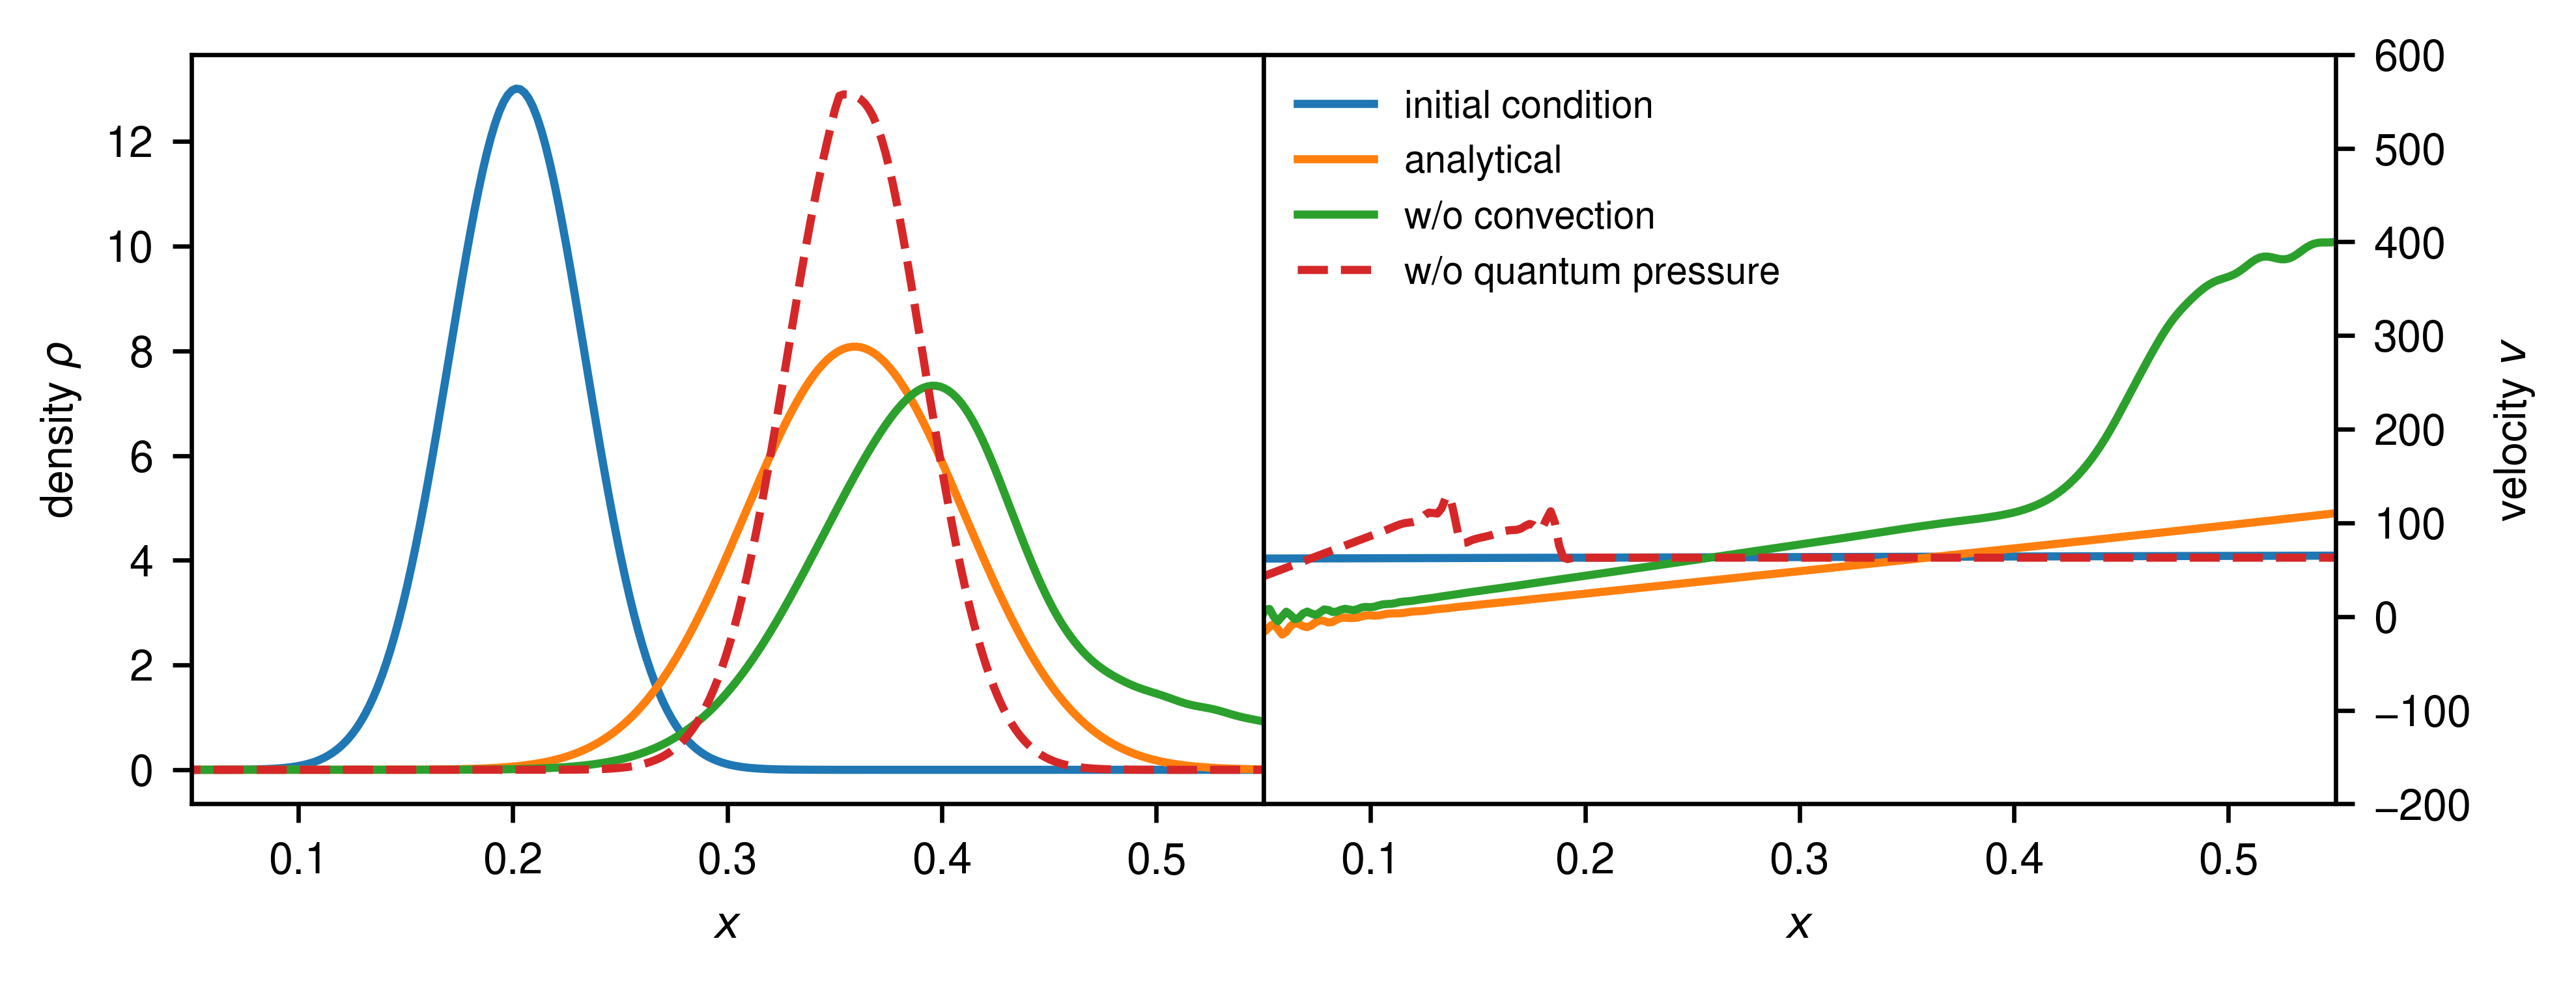

In [12]:
idx = 100
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind/{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind_without_convection/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(
    f"runs/1d/travelling_wave_packet_ho-upwind_without_diffusion/{idx}.npz"
    )
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
plt.xlim(0.05, .55)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, density3[8:-8], ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
plt.xlim(0.05, .55)
plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx)[8:-8], label = "initial condition")
plt.plot(xx, getv(phase1, dx)[8:-8], label = "analytical")
plt.plot(xx, getv(phase2, dx)[8:-8], label = "w/o convection")
plt.plot(xx, getv(phase3, dx)[8:-8], label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"velocity $v$")
leg = plt.legend(loc="upper left",fontsize = 7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/travelling_gaussian.pdf", bbox_inches='tight')

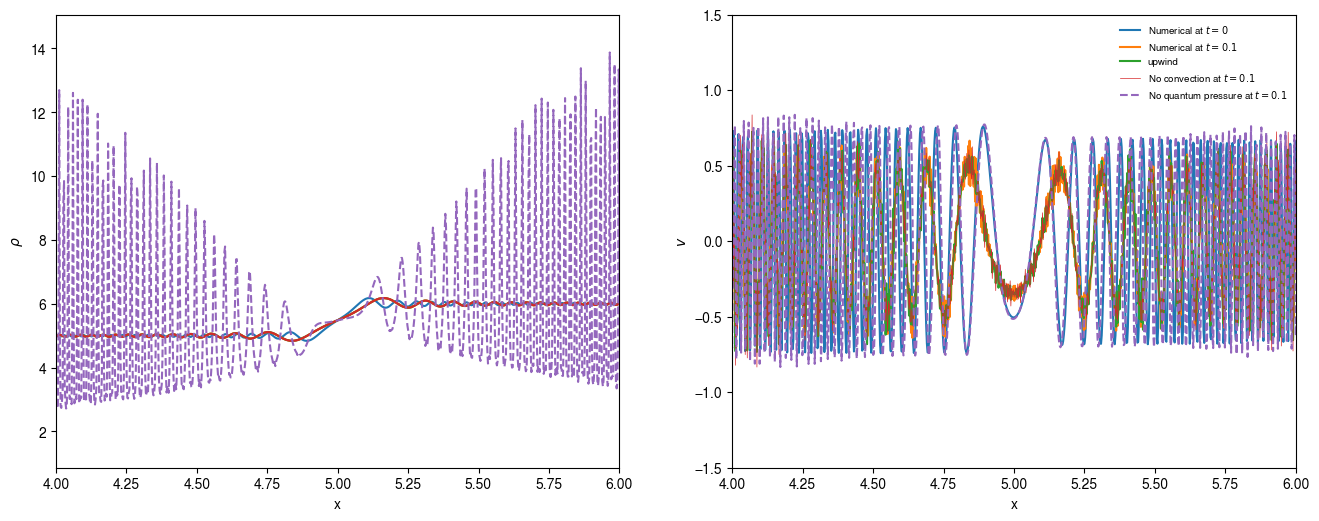

In [30]:
idx = 30
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/quasi-shock_spectral_(fft)/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/quasi-shock_spectral_(fft)/{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/quasi-shock_ho-upwind/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(f"runs/1d/quasi-shock_ho-upwind_without_convection/{idx}.npz")
config4, psi4 , density4, phase4= animation.loadRun(f"runs/1d/quasi-shock_ho-upwind_without_diffusion/{idx}.npz")
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
config1["t0"], config1["tEnd"], config1["domainSize"]
fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi = 100)
plt.sca(ax[0])
plt.xlim(4, 6)
plt.plot(xx, density0, label = "Numerical at $t=0$")
plt.plot(xx, density1, label = "Numerical at $t=0.1$")
plt.plot(xx, density2, label = "upwind at $t=0.1$")
plt.plot(xx, density3, label = "No convection at $t=0.1$")
plt.plot(xx, density4, label = "No quantum pressure at $t=0.1$", ls = "dashed")
plt.xlabel("x")
plt.ylabel(r"$\rho$")
plt.sca(ax[1])
plt.xlim(4, 6)
plt.ylim(-1.5, 1.5)
#plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx), label = "Numerical at $t=0$")
plt.plot(xx, getv(phase1, dx), label = "Numerical at $t=0.1$")
plt.plot(xx, getv(phase2, dx), label = "upwind")
plt.plot(xx, getv(phase3, dx), label = "No convection at $t=0.1$", lw = 0.5)
plt.plot(xx, getv(phase4, dx), label = "No quantum pressure at $t=0.1$", ls = "dashed")
plt.xlabel("x")
plt.ylabel(r"$v$")
leg = plt.legend(fontsize=7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/quasi-shock.pdf")

1.2549999999999952 20 10


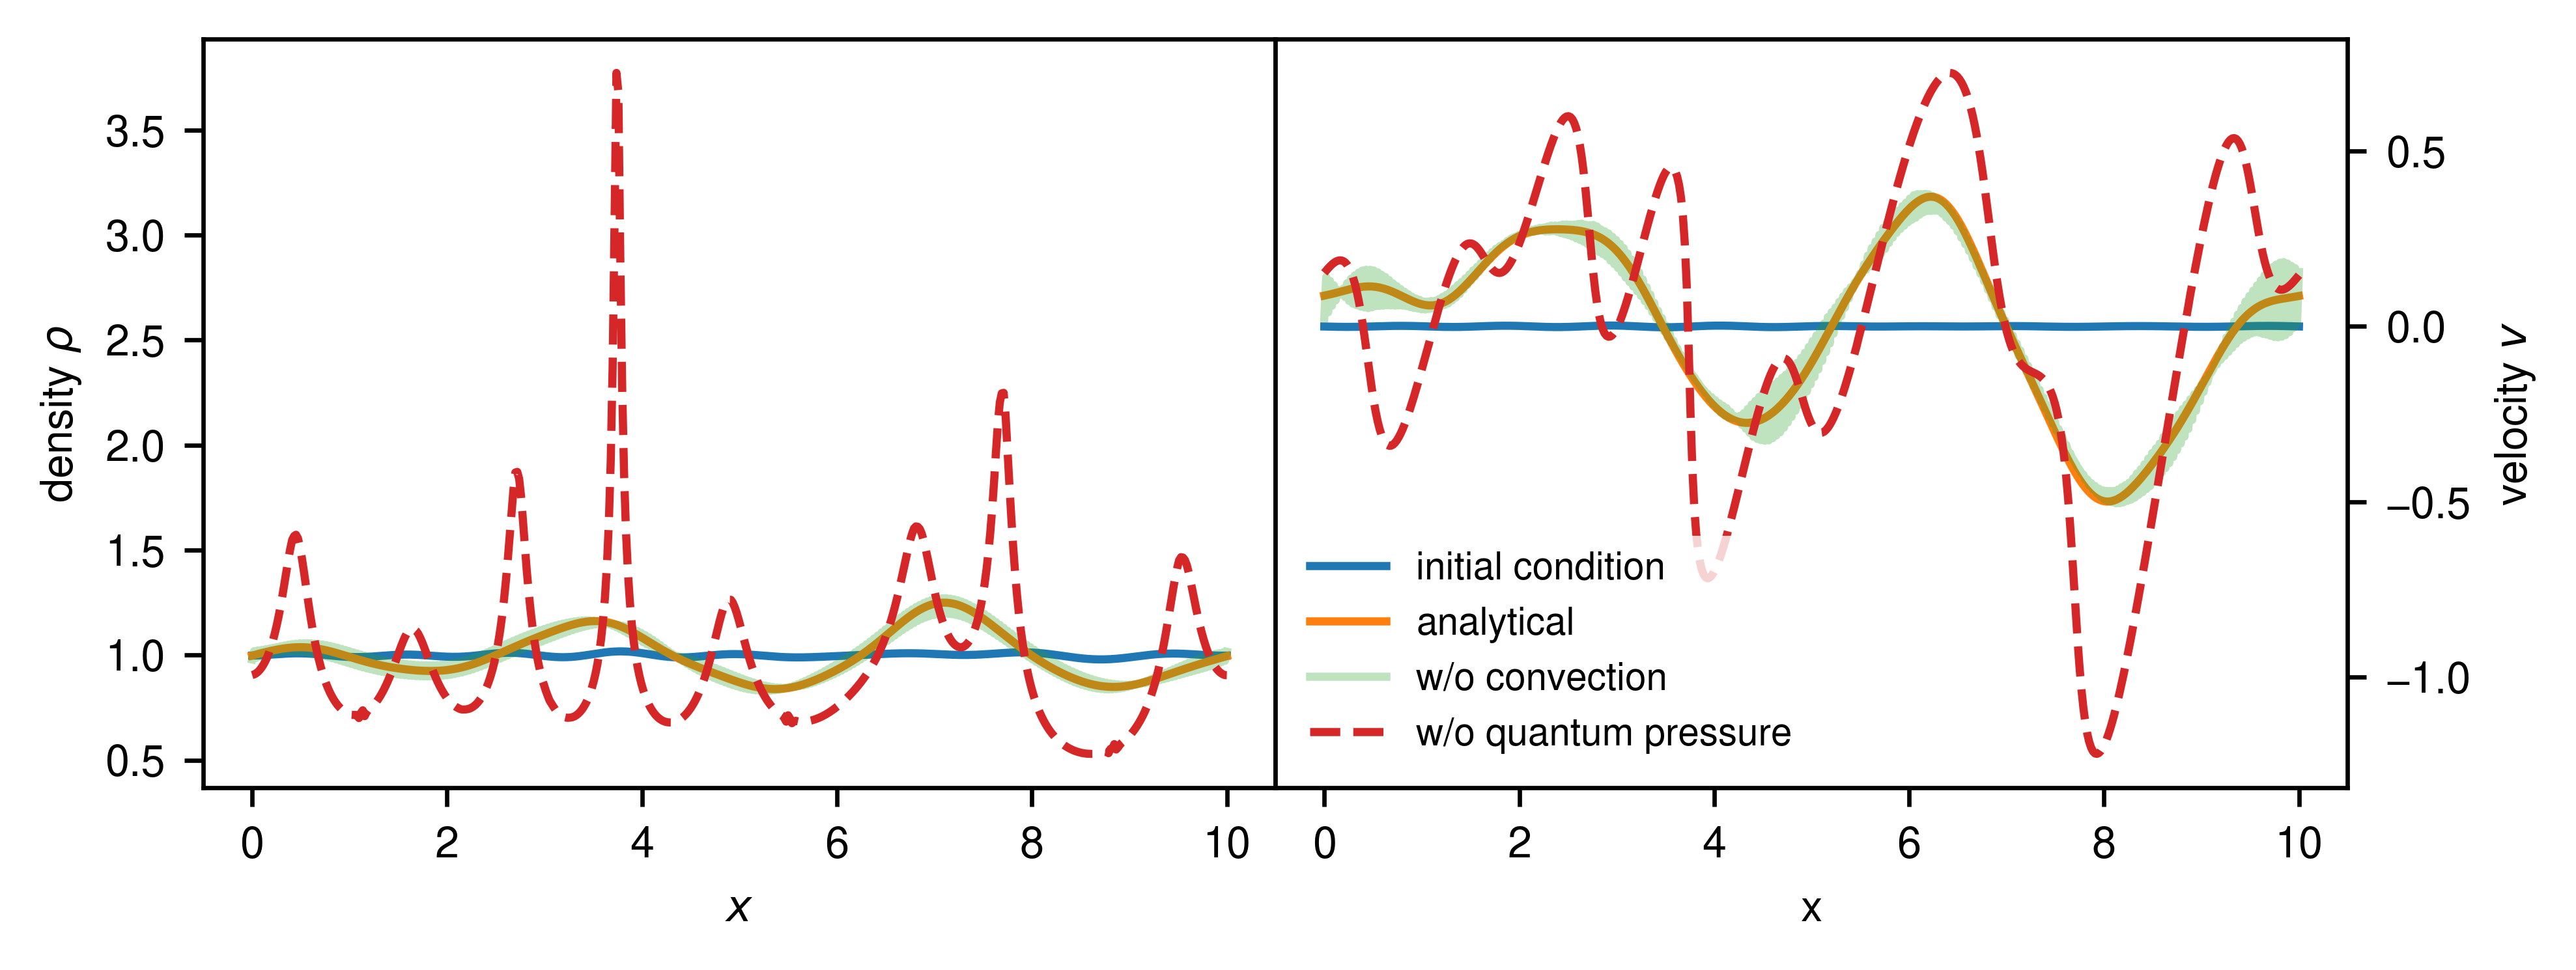

In [10]:
idx = 250
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{idx}.npz")
config4, psi4 , density4, phase4= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{1000}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/soliton_ho-upwind_without_convection/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(f"runs/1d/soliton_ho-upwind_without_diffusion/{idx}.npz")
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
#plt.xlim(0.05, .55)
plt.plot(xx, density0)
plt.plot(xx, density1)
#plt.plot(xx, density)
plt.plot(xx, density2, alpha = 0.3)
plt.plot(xx, density3, ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
#plt.xlim(0.05, .55)
#plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx), label = "initial condition")
plt.plot(xx, getv(phase1, dx), label = "analytical")
plt.plot(xx, getv(phase2, dx), label = "w/o convection", alpha =0.3)
plt.plot(xx, getv(phase3, dx), label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("x")
plt.ylabel(r"velocity $v$")
leg = plt.legend(fontsize = 7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/soliton.pdf", bbox_inches='tight')
